# Machine learning model.

Can we predict real estate prices based on features?

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler

In [3]:
df = pd.read_csv("teste_data.csv")
display(df)

,URL,Type,Subtype,Price,Bedroom,Living_area,Listing_address,Postal_code,Locality,District,...,Kitchen,Facade,Open Fire,Furnished,State of the building,zip,city,lng,lat,Province
0,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,169000.0,2.0,88.0,Torhoutsesteenweg 336,8400.0,Oostende,Oostend,...,not_available,2.0,False,False,TO_BE_DONE_UP,8400,Oostende,2.920327,51.230318,West-Vlaanderen
1,https://www.immoweb.be/en/classified/house/for...,house,house,219000.0,3.0,163.0,Edith Cavellstraat 28,8400.0,Oostende,Oostend,...,not_available,2.0,False,False,TO_RENOVATE,8400,Oostende,2.920327,51.230318,West-Vlaanderen
2,https://www.immoweb.be/en/classified/house/for...,house,house,299000.0,4.0,154.0,Duivenhokstraat 118,8400.0,Oostende,Oostend,...,installed,NaN,False,False,JUST_RENOVATED,8400,Oostende,2.920327,51.230318,West-Vlaanderen
3,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,169000.0,1.0,62.0,Karel Janssenslaan 49,8400.0,Oostende,Oostend,...,not_available,NaN,False,False,not_available,8400,Oostende,2.920327,51.230318,West-Vlaanderen
4,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,169000.0,1.0,62.0,Karel Janssenslaan 49,8400.0,Oostende,Oostend,...,not_available,NaN,False,False,not_available,8400,Oostende,2.920327,51.230318,West-Vlaanderen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8868,https://www.immoweb.be/en/classified/house/for...,house,house,309900.0,3.0,150.0,Rue du Monçay 11,6852.0,OPONT,Neufchâteau,...,installed,4.0,True,False,TO_BE_DONE_UP,6852,Maissin,5.180578,49.965111,Luxemburg
8869,https://www.immoweb.be/en/classified/house/for...,house,house,300000.0,4.0,120.0,"Am Schlossberg, Ouren 85",4790.0,Burg-Reuland,Verviers,...,installed,3.0,False,False,GOOD,4790,Burg-Reuland,6.121679,50.174781,Luik
8870,https://www.immoweb.be/en/classified/house/for...,house,house,349000.0,4.0,272.0,Rue des Aulnais 1-3,5576.0,Froidfontaine,Dinant,...,not_available,4.0,False,False,GOOD,5576,Froidfontaine,5.000634,50.060403,Namen
8871,https://www.immoweb.be/en/classified/house/for...,house,house,265000.0,2.0,147.0,Lange Blok 50,2431.0,Veerle,Turnhout,...,installed,4.0,False,False,TO_BE_DONE_UP,2431,Varendonk,4.955225,51.080132,Antwerpen


### As we've learned in our previous analysis, living area has the highest correlation with price.

Let's plot those 2 variables against one another and see what that correlation looks like.

(8677, 25)

[Text(0.5, 1.0, 'Price vs Living area'),
 Text(0.5, 0, 'Living Area'),
 Text(0, 0.5, 'Price')]

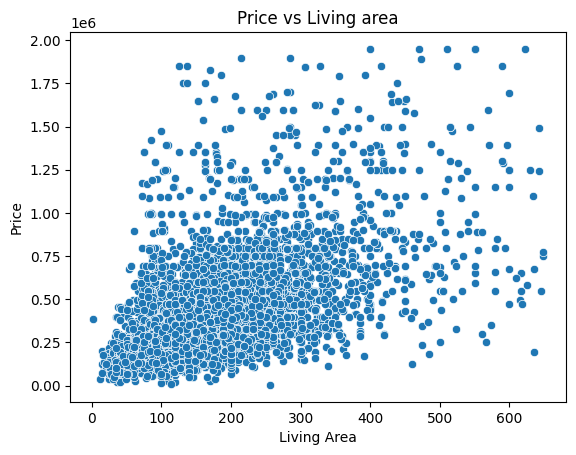

In [9]:
#Remove outliers
std = df.select_dtypes('float').std()
distance = abs(df.select_dtypes('float')-df.select_dtypes('float').mean()).div(std)
living_outliers = distance.loc[distance["Living_area"] > 3, "Living_area"]
price_outliers = distance.loc[distance["Price"] > 3, "Living_area"]
df = df[~(df.index.isin(living_outliers.index) | df.index.isin(price_outliers.index))]
display(df.shape)

plot = sns.scatterplot(data=df, x="Living_area", y="Price")
plot.set(title="Price vs Living area",xlabel="Living Area", ylabel="Price")

### Feels like maybe if we can filter it through some other variables, the living area would be more meaningful. Let's take a look at the same graph by now filtered by some categorical data.

First let's filter by type.

[Text(0.5, 1.0, 'Price vs Living area separated by Type'),
 Text(0.5, 0, 'Living Area'),
 Text(0, 0.5, 'Price')]

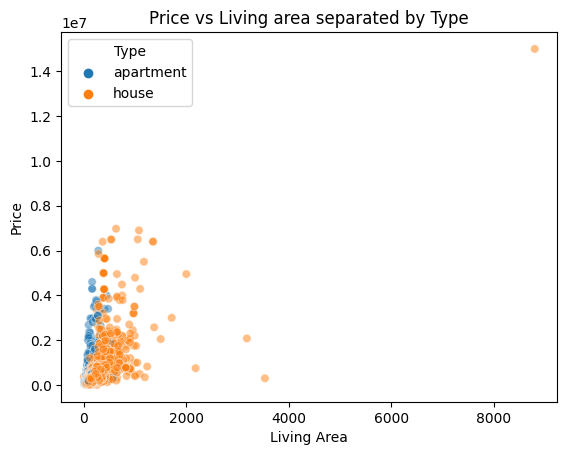

In [5]:
plot = sns.scatterplot(data=df, x="Living_area", y="Price", hue="Type", alpha=0.5)
plot.set(title="Price vs Living area separated by Type",xlabel="Living Area", ylabel="Price")

### It seems to behave different, let's see other variables

Let's take a look at province

[Text(0.5, 1.0, 'Average listing price per Province')]

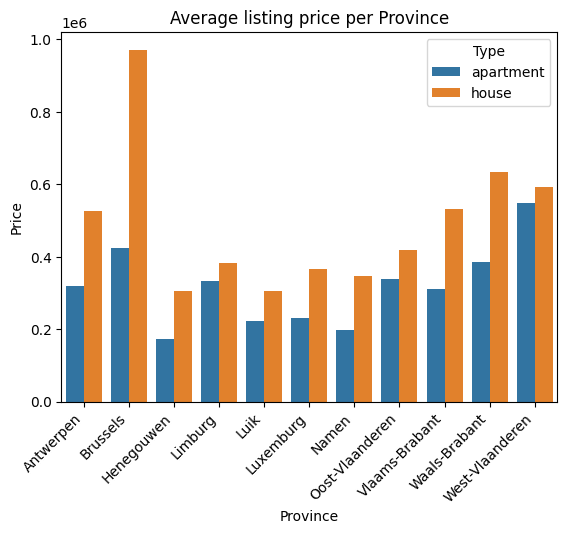

In [6]:
plot = sns.barplot(data=df.loc[:,["Price", "Province", "Type"]].groupby(["Province", "Type"], as_index=False).mean(), x="Province", y="Price", hue="Type")
plot.set_xticklabels(plot.get_xticklabels(),rotation=45, horizontalalignment='right')
plot.set(title="Average listing price per Province")

Let's filter by city (district) first

In [7]:
df_reg=df[df["District"].isin(df["District"].value_counts()[0:20].index.to_list())]
print(df_reg.shape, df_reg["District"].unique())
df_dummies = pd.get_dummies(df_reg[["Type", "District"]])
df_regression = pd.concat([df_reg[["Price", "Living_area"]], df_dummies.drop(columns=df_dummies.columns[[0,-1]])], axis=1)

(7325, 25) ['Oostend' 'Mechelen' 'Brussels' 'Leuven' 'Halle-Vilvoorde' 'Antwerp'
 'Nivelles' 'Namur' 'Liège' 'Turnhout' 'Gent' 'Mons' 'Aalst' 'Hasselt'
 'Charleroi' 'Brugge' 'Oudenaarde' 'Kortrijk' 'Sint-Niklaas' 'Roeselare']


In [30]:
district_list=df["District"].value_counts()[0:20].index.to_list()
#df_local = df[df["Type"] == "house"]
#df_local = df[df["Living_area"] <= 300]
df_local = df

n=20 #test size

df_dummies = pd.get_dummies(df_local["Type"])
df_dummies.drop(columns=df_dummies.columns[-1], inplace=True)
df_dummies = pd.concat([df_local[["Price", "Living_area", "District"]], df_dummies], axis=1)
overall_score = []

for district in district_list:
    df_regression = df_dummies[df_dummies["District"] == district]
    print(df_regression.shape)
    X = df_regression.drop(columns=["Price", "District"]).to_numpy()
    y = df_regression["Price"].to_numpy()
    avg_score = 0
    for i in range(n):
        (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.25)
        transformer = MaxAbsScaler().fit(X_train)
        X_train = transformer.transform(X_train)
        X_test = transformer.transform(X_test)

        #pipe = make_pipeline(MaxAbsScaler(), LinearRegression())
        #pipe.fit(X_train, y_train)
        #regressor = SGDRegressor(loss='epsilon_insensitive', max_iter=50000)
        regressor = LinearRegression()
        regressor.fit(X_train,y_train)
        score = regressor.score(X_test,y_test)
        #score = pipe.score(X_test,y_test)
        avg_score = (avg_score * i + score)/(i+1)
        overall_score.append(score)

    print(f"Avg test score for district {district}: {avg_score}")
print(f"Avg test score for all districts: {np.mean(overall_score)}")

(1056, 4)


/home/henrique/envs/elizadata/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


KeyboardInterrupt: 

In [16]:
df_local=df[~df["District"].isin(district_list)]
print(df_local.shape)
X = df_regression.drop(columns=["Price", "District"]).to_numpy()
y = df_regression["Price"].to_numpy()
avg_score=[]
for i in range(n):
    (X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size= 0.25)
    transformer = MaxAbsScaler().fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)

    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    score = regressor.score(X_test,y_test)
    avg_score.append(score)
print(avg_score)
print(f"Avg test score for remaining data: {np.mean(avg_score)}")

(1523, 25)
[0.6367667475285731, 0.17797590852510803, 0.45106324539671194, 0.43255605017877796, 0.5065666257517789, 0.2523100196688318, 0.6032834842477959, 0.524710138613016, 0.611165555983007, 0.36919734692799033, 0.6669138692930078, 0.531798988652348, 0.6257045064532142, 0.49314931358722147, 0.4897877641301708, 0.756463205576016, 0.6131680736893053, 0.14201196969373353, 0.3053657279067724, 0.560047602805101]
Avg test score for remaining data: 0.48750030723042403


[Text(0.5, 1.0, 'Price vs Living area separated by Type'),
 Text(0.5, 0, 'Living Area'),
 Text(0, 0.5, 'Price')]

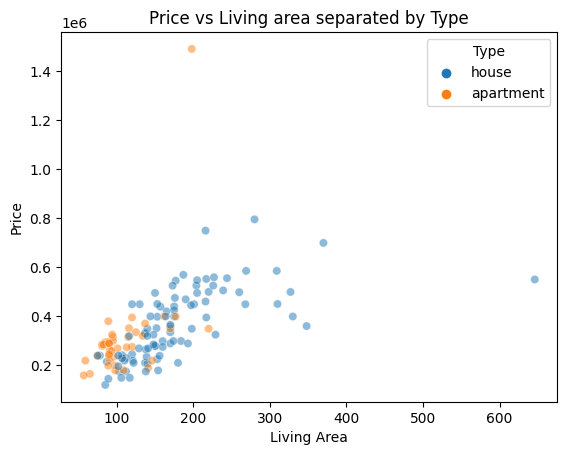

In [88]:
plot = sns.scatterplot(data=df_local[df_local["District"] == "Sint-Niklaas"], x="Living_area", y="Price", hue="Type", alpha=0.5)
plot.set(title="Price vs Living area separated by Type",xlabel="Living Area", ylabel="Price")

### Once again, feels like filtering by this kind of information will be meaningful.

Let's turn those 2 variables (Type and Province into numeric variables)

In [4]:
df_dummies = pd.get_dummies(df[["Type"]])
#display(df_dummies)
df_regression = pd.concat([df[["Price", "Living_area"]], df_dummies.drop(columns=df_dummies.columns[[0,-1]])], axis=1)
#display(df_regression)

#display(df_regression.isnull().sum())

Let's try to use just the main cities (Districts)

### Now let's start our model!



In [102]:
#X = df_regression[["Living_area", "Type_apartment", "Province_Antwerpen", "Province_Brussels", "Province_Henegouwen", "Province_Limburg", "Province_Luik", "Province_Luxemburg", "Province_Namen", "Province_Oost-Vlaanderen", "Province_Vlaams-Brabant", "Province_Waals-Brabant"]].to_numpy()
X = df_regression.drop(columns=["Price"]).to_numpy()
y = df_regression["Price"].to_numpy()

(X_train, X_test, y_train, y_test) = train_test_split(X,y)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print(f"Score on the training data: {regressor.score(X_train,y_train)}")
print(f"Score on the test data: {regressor.score(X_test,y_test)}")


Score on the training data: 0.4784306271243898
Score on the test data: 0.5596600645250533


### We have our results!

Although they are not exactly great :|

If we want our model to be better, we need to better understand our data, see where it fails and how etc.

First let's change the loss function, I have the feeling that the outliers are too impactful, so let's use the MAE or mean absolute error.

In [16]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y)

mae_regressor = SGDRegressor(loss='epsilon_insensitive')
mae_regressor.fit(X_train,y_train)

print(f"Score on the training data: {mae_regressor.score(X_train,y_train)}")
print(f"Score on the test data: {mae_regressor.score(X_test, y_test)}")

Score on the training data: 0.14891752703189376
Score on the test data: 0.12469694421625344
